In [1]:
import pandas as pd
from isaac.visualization import plot_lineplot_with_paper_style

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
question_type = "force"
directory = "sequence_length_plots/"
stats = pd.read_hdf(directory+question_type+"_stats.h5")

In [3]:
stats.seq_length = "length="+stats.seq_length

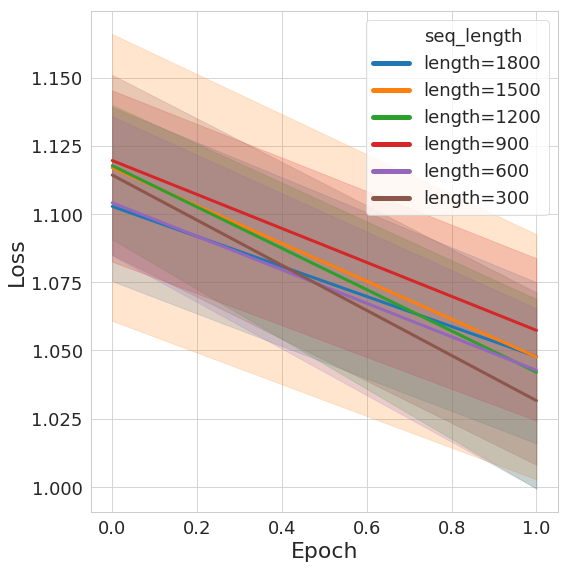

In [4]:
ax = plot_lineplot_with_paper_style(directory+question_type+"_losses.pdf", 
                                    x="Epoch", y="Loss", hue="seq_length",  markers=True, data=stats)

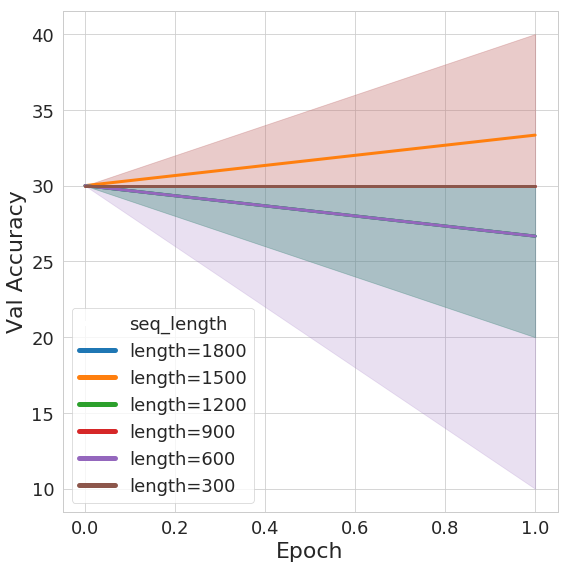

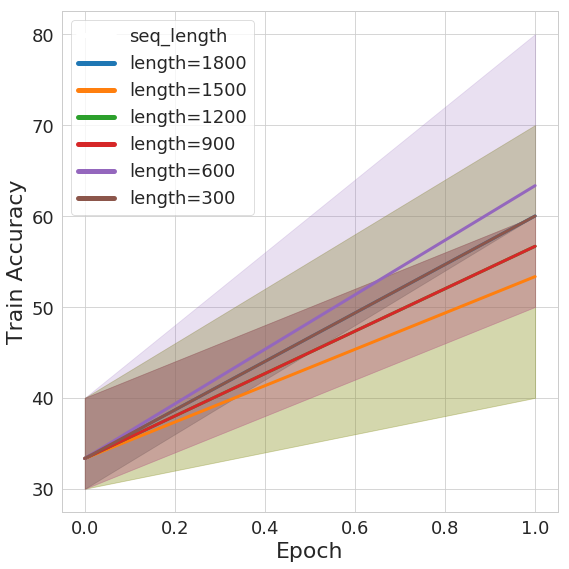

In [5]:
ax = plot_lineplot_with_paper_style(directory+question_type+"_all_val_acc_plot.pdf", 
                                    x="Epoch", y="Val Accuracy", hue="seq_length", data=stats)

ax = plot_lineplot_with_paper_style(directory+question_type+"_all_train_acc_plot.pdf", 
                                    x="Epoch", y="Train Accuracy", hue="seq_length", data=stats)